In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/basic-image-adversaries/basic-image-adversaries.zip
!unzip -qq basic-image-adversaries.zip
%cd basic-image-adversaries

--2023-12-07 17:54:29--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/basic-image-adversaries/basic-image-adversaries.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.176.1, 52.92.227.234, 52.92.227.26, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.176.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170863 (167K) [binary/octet-stream]
Saving to: ‘basic-image-adversaries.zip’

basic-image-adversa 100%[===================>] 166.86K   779KB/s    in 0.2s    

2023-12-07 17:54:30 (779 KB/s) - ‘basic-image-adversaries.zip’ saved [170863/170863]

/content/basic-image-adversaries


In [2]:
# import necessary packages
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications.resnet50 import decode_predictions
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import argparse
import imutils
import json
import cv2
import os

In [3]:
def plt_imshow(title, image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

In [23]:
def get_class_idx(label):
	# build the path to the ImageNet class label mappings file
	labelPath = os.path.join("pyimagesearch",
		"imagenet_class_index.json")

	with open(labelPath) as f:
		imageNetClasses = {labels[1]: int(idx) for (idx, labels) in
			json.load(f).items()}

	return imageNetClasses.get(label, None)

In [7]:
labelPath = os.path.join("pyimagesearch",
		"imagenet_class_index.json")
with open(labelPath) as f:
    print(json.load(f).items())

dict_items([('0', ['n01440764', 'tench']), ('1', ['n01443537', 'goldfish']), ('2', ['n01484850', 'great_white_shark']), ('3', ['n01491361', 'tiger_shark']), ('4', ['n01494475', 'hammerhead']), ('5', ['n01496331', 'electric_ray']), ('6', ['n01498041', 'stingray']), ('7', ['n01514668', 'cock']), ('8', ['n01514859', 'hen']), ('9', ['n01518878', 'ostrich']), ('10', ['n01530575', 'brambling']), ('11', ['n01531178', 'goldfinch']), ('12', ['n01532829', 'house_finch']), ('13', ['n01534433', 'junco']), ('14', ['n01537544', 'indigo_bunting']), ('15', ['n01558993', 'robin']), ('16', ['n01560419', 'bulbul']), ('17', ['n01580077', 'jay']), ('18', ['n01582220', 'magpie']), ('19', ['n01592084', 'chickadee']), ('20', ['n01601694', 'water_ouzel']), ('21', ['n01608432', 'kite']), ('22', ['n01614925', 'bald_eagle']), ('23', ['n01616318', 'vulture']), ('24', ['n01622779', 'great_grey_owl']), ('25', ['n01629819', 'European_fire_salamander']), ('26', ['n01630670', 'common_newt']), ('27', ['n01631663', 'eft'

In [10]:
with open(labelPath) as f:
  imageNetClasses = {labels[1]: int(idx) for (idx, labels) in json.load(f).items()}
imageNetClasses

{'tench': 0,
 'goldfish': 1,
 'great_white_shark': 2,
 'tiger_shark': 3,
 'hammerhead': 4,
 'electric_ray': 5,
 'stingray': 6,
 'cock': 7,
 'hen': 8,
 'ostrich': 9,
 'brambling': 10,
 'goldfinch': 11,
 'house_finch': 12,
 'junco': 13,
 'indigo_bunting': 14,
 'robin': 15,
 'bulbul': 16,
 'jay': 17,
 'magpie': 18,
 'chickadee': 19,
 'water_ouzel': 20,
 'kite': 21,
 'bald_eagle': 22,
 'vulture': 23,
 'great_grey_owl': 24,
 'European_fire_salamander': 25,
 'common_newt': 26,
 'eft': 27,
 'spotted_salamander': 28,
 'axolotl': 29,
 'bullfrog': 30,
 'tree_frog': 31,
 'tailed_frog': 32,
 'loggerhead': 33,
 'leatherback_turtle': 34,
 'mud_turtle': 35,
 'terrapin': 36,
 'box_turtle': 37,
 'banded_gecko': 38,
 'common_iguana': 39,
 'American_chameleon': 40,
 'whiptail': 41,
 'agama': 42,
 'frilled_lizard': 43,
 'alligator_lizard': 44,
 'Gila_monster': 45,
 'green_lizard': 46,
 'African_chameleon': 47,
 'Komodo_dragon': 48,
 'African_crocodile': 49,
 'American_alligator': 50,
 'triceratops': 51,
 

In [12]:
imageNetClasses.get('ladybug', None)

301

In [13]:
def preprocess_image(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = preprocess_input(image)
  image = cv2.resize(image, (224, 224))
  image = np.expand_dims(image, axis = 0)
  return image

In [14]:
args = {
    "image": "pig.jpg"
}

In [15]:
image = cv2.imread(args["image"])
output = image.copy()

output = imutils.resize(output, width=400)
preprocessedImage = preprocess_image(image)

In [16]:
model = ResNet50(weights="imagenet")
predictions = model.predict(preprocessedImage)

1/1 [==============================] - 2s 2s/step


In [17]:
predictions = decode_predictions(predictions, top=3)[0]

35363/35363 [==============================] - 0s 0us/step


In [18]:
predictions

[('n02395406', 'hog', 0.99968374),
 ('n02396427', 'wild_boar', 0.0003159518),
 ('n03935335', 'piggy_bank', 9.8273716e-08)]

In [24]:
for (i, (imagenetID, label, prob)) in enumerate(predictions):
	if i == 0:
		print("[INFO] {} => {}".format(label, get_class_idx(label)))

	# display the prediction to our screen
	print("[INFO] {}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] hog => 341
[INFO] 1. hog: 99.97%
[INFO] 2. wild_boar: 0.03%
[INFO] 3. piggy_bank: 0.00%


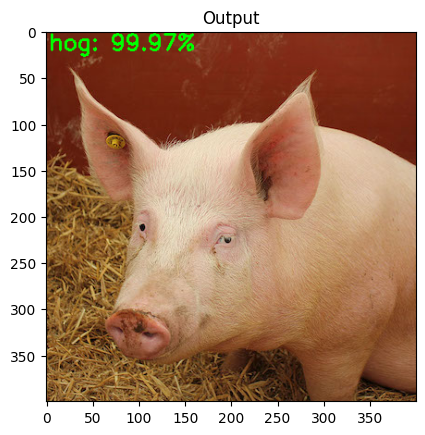

In [26]:
text = "{}: {:.2f}%".format(predictions[0][1],
                            predictions[0][2] * 100)
cv2.putText(output, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
plt_imshow("Output", output)

In [27]:
def preprocess_image(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  image = np.expand_dims(image, axis=0)

  return image

In [28]:
def clip_eps(tensor, eps):
  # clip the values of the tensor to a given range and return it
  return tf.clip_by_value(tensor, clip_value_min=-eps, clip_value_max=eps)

In [29]:
def generate_adversaries(model, baseImage, delta, classIdx, steps=50):
  for step in range(0, steps):
    with tf.GradientTape() as tape:
      tape.watch(delta)

      adversary = preprocess_input(baseImage + delta)

      predictions = model(adversary, training=False)

      loss = -sccLoss(tf.convert_to_tensor([classIdx]), predictions)

      if step % 5 == 0:
        print("step: loss: {}...".format(step, loss.numpy()))

    gradients = tape.gradient(loss, delta)

    optimizer.apply_gradients([(gradients, delta)])

    delta.assign_add(clip_eps(delta, eps=EPS))
  return delta


In [30]:
args = {
	"input": "pig.jpg",
    "output": "adversarial.png",
    "class_idx": 341
}

In [31]:
EPS = 2 / 255.0
LR = 0.1

In [32]:
image = cv2.imread(args["input"])
image = preprocess_image(image)

In [36]:
model = ResNet50(weights="imagenet")
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=LR)
sccLoss = SparseCategoricalCrossentropy()

In [37]:
baseImage = tf.constant(image, dtype=tf.float32)
delta = tf.Variable(tf.zeros_like(baseImage), trainable=True)

deltaUpdated = generate_adversaries(model, baseImage, delta, args["class_idx"])

adverImage = (baseImage + deltaUpdated).numpy().squeeze()
adverImage = np.clip(adverImage, 0, 255).astype("uint8")
adverImage = cv2.cvtColor(adverImage, cv2.COLOR_RGB2BGR)

cv2.imwrite(args["output"], adverImage)

step: loss: 0...
step: loss: 5...
step: loss: 10...
step: loss: 15...
step: loss: 20...
step: loss: 25...
step: loss: 30...
step: loss: 35...
step: loss: 40...
step: loss: 45...


True

[INFO] running inference on the adversarial example...
1/1 [==============================] - 3s 3s/step
[INFO] label: wombat confidence: 100.00%


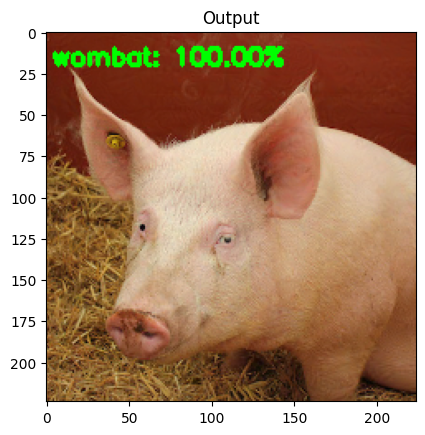

In [38]:
print("[INFO] running inference on the adversarial example...")
preprocessedImage = preprocess_input(baseImage + deltaUpdated)
predictions = model.predict(preprocessedImage)
predictions = decode_predictions(predictions, top=3)[0]
label = predictions[0][1]
confidence = predictions[0][2] * 100
print("[INFO] label: {} confidence: {:.2f}%".format(label,
	confidence))

text = "{}: {:.2f}%".format(label, confidence)
cv2.putText(adverImage, text, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
	(0, 255, 0), 2)

# show the output image
plt_imshow("Output", adverImage)